# Data Scraping Challenge

### Context:
Sequoia Capital is a venture capital firm known for its investments in technology companies. Founded in 1972, Sequoia has played a significant role in funding and nurturing some of the world's most successful startups, including Apple, Google, Airbnb, and Dropbox. The firm typically invests in early-stage companies and provides not only financial support but also strategic guidance and networking opportunities to help its portfolio companies grow and succeed. Working at a nearly-stage startup can be career-defining for early employees. **MYLANE** would like to empower job seekers with data needed to identif yearly-stage startups that are likely to grow to become sector/industry leaders.

**Your challenge will be to**
- build a python web scraper to collect data on all companies Sequoia invested in.
- perform basic exploratory data analysis to identify 1 or 2 key insights from the data
- create a presentation with data visualization(s) that best communicates this insight
- You are welcome to use any python libraries or frameworks as long as they are open-source.

In [96]:

filename = 'sequoia_data.csv'

### The Data
| Column name | Description |
|---|---|
| name | The Name of the company. |
| url | The Company's URL. |
| stage | The Current stage of the Company's Development. |
| category | The Category the company focuses on. |
| milestone | Important years for the company. |
| team | Names of People that started the company. |
| jobs | The Jobs available within the company. |
| partners | Names of the Company's Partners. |


### Exploratory Data Analysis (EDA)

In [97]:
# importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

In [98]:
#Reading the dataset exported as a csv in the scraper script
df = pd.read_csv(filename)
print(f"Dataset contains {df.shape[0]} companies")

Dataset contains 341 companies


In [99]:

#General Information about the data
df.info()

#Description of the Data
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        341 non-null    object
 1   url         341 non-null    object
 2   stage       340 non-null    object
 3   category    340 non-null    object
 4   milestones  340 non-null    object
 5   team        324 non-null    object
 6   jobs        143 non-null    object
 7   partners    172 non-null    object
dtypes: object(8)
memory usage: 21.4+ KB


,name,url,stage,category,milestones,team,jobs,partners
count,341,341,340,340,340,324,143,172
unique,341,341,5,26,171,323,143,22
top,[24]7.AI,https://www.247.ai/,Growth,ENTERPRISE,"Founded 2021, Partnered 2021",Elon Musk,"Marketing Manager, Product Project Manager",Roelof Botha
freq,1,1,147,132,16,2,1,20


In [100]:
#Top 5 entries in the data
print('First five entries in the dataset'+'\n')
df.head()

First five entries in the dataset



,name,url,stage,category,milestones,team,jobs,partners
0,[24]7.AI,https://www.247.ai/,Growth,"AI/ML, ENTERPRISE","Founded 2000, Partnered 2003","PV Kannan, Shanmugam ""Nags"" Nagarajan",NaN,Michael Moritz
1,100 THIEVES,https://100thieves.com/,Growth,CONSUMER,"Founded 2017, Partnered 2018",NaN,"Marketing Manager, Product Project Manager",NaN
2,23ANDME,https://www.23andme.com/,IPO,HEALTHCARE,"Founded 2006, Partnered 2017, IPO 2021",Anne Wojcicki,"Sr. Product Manager, Health, Head of Social Me...",Roelof Botha
3,AALTO,https://aalto.com/,Early,CONSUMER,"Founded 2018, Partnered 2019","Jon Carpenter, Nicholas Narodny",NaN,Bryan Schreier
4,ACTIONIQ,http://www.actioniq.co/,Growth,ENTERPRISE,"Founded 2014, Partnered 2014","David Todrin, Tasso Argyros, Nitay Joffe",NaN,Doug Leone


In [101]:
#Bottom 5 entries in the data
print('Last five entries in the dataset'+'\n')
df.tail()

Last five entries in the dataset



,name,url,stage,category,milestones,team,jobs,partners
336,ZEET.CO,https://zeet.co/,Pre-Seed/Seed,ENTERPRISE,"Founded 2020, Partnered 2022, Arc 2022","Johnny Dallas, Zihao Zhang","Platform Engineer, Senior Front End Engineer/T...",NaN
337,ZEFIR,https://www.zefir.fr/,Early,CONSUMER,"Founded 2020, Partnered 2022","Remy Fabre, Louis Lambert","Software Engineer, Account Management, Account...",George Robson
338,ZIPLINE,https://flyzipline.com/,Growth,ENTERPRISE,"Founded 2012, Partnered 2012","Keller Rinaudo, Keenan Wyrobek","Field Systems Engineer - P1 Air Systems, Recru...",Alfred Lin
339,ZOOM,https://zoom.us/,IPO,"CONSUMER, ENTERPRISE","Founded 2011, Partnered 2016, IPO 2019",Eric Yuan,NaN,NaN
340,ZUM,https://ridezum.com/,Growth,"CLIMATE TECH, ENTERPRISE","Founded 2015, Partnered 2017","Abhishek Garg, Vivek Garg, Ritu Narayan","Regional Manager (East Coast), Safety Supervis...",Bryan Schreier


**Partners** and **Jobs** were removed due to the fact that they have a lot of null values, and **url** was also dropped, since it does not provide any useful information for analysis

In [102]:
#Drop Partner and URL Column
df = df.drop(['partners', 'url','jobs'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        341 non-null    object
 1   stage       340 non-null    object
 2   category    340 non-null    object
 3   milestones  340 non-null    object
 4   team        324 non-null    object
dtypes: object(5)
memory usage: 13.4+ KB


In [103]:
#Replace Null Values with None
df = df.replace(np.nan, None)
df.fillna('NA', inplace=True)

#Check For Null Values
df.isnull().sum()

name          0
stage         0
category      0
milestones    0
team          0
dtype: int64

In [104]:
#Check for Duplicate Values
df.nunique()


name          341
stage           6
category       27
milestones    172
team          324
dtype: int64

**KEEN TECHNOLOGIES** has little useful data, so it was dropped

In [105]:
#df.drop(index=157, inplace=True)
display(df.iloc[157])

df.drop(index=157, inplace=True)


name          KEEN TECHNOLOGIES
stage                        NA
category                  AI/ML
milestones                   NA
team                         NA
Name: 157, dtype: object

### Feature Engineering

- Founding Year : Extracted from milestones column
- Partnered Year : Extracted from milestones column
- IPO Year : Extracted from milestones column
- Year Difference : Partnered Year - Founded Year

In [106]:
#Create a new data frame with only name and milestone columns
new_df = df[['name','category','milestones']]
new_df.head()

,name,category,milestones
0,[24]7.AI,"AI/ML, ENTERPRISE","Founded 2000, Partnered 2003"
1,100 THIEVES,CONSUMER,"Founded 2017, Partnered 2018"
2,23ANDME,HEALTHCARE,"Founded 2006, Partnered 2017, IPO 2021"
3,AALTO,CONSUMER,"Founded 2018, Partnered 2019"
4,ACTIONIQ,ENTERPRISE,"Founded 2014, Partnered 2014"


In [107]:
# Extract Founded, Partnered and IPO years
new_df['Founded Year'] = new_df['milestones'].str.extract(r'Founded (\d{4})')
new_df['Partnered Year'] = new_df['milestones'].str.extract(r'Partnered (\d{4})')
new_df['IPO Year'] = new_df['milestones'].str.extract(r'IPO (\d{4})')


# Replace NaN values with '0'
new_df['Founded Year'].fillna('0', inplace=True)
new_df['Partnered Year'].fillna('0', inplace=True)
new_df['IPO Year'].fillna('0', inplace=True)

#Convert to int type to subtract
new_df['Founded Year'] = new_df['Founded Year'].astype(int)
new_df['Partnered Year'] = new_df['Partnered Year'].astype(int)
new_df['IPO Year'] = new_df['IPO Year'].astype(int)

#Year Interval Between Founding and being Partnered
new_df['Year Difference']= new_df['Partnered Year']- new_df['Founded Year']

if new_df['IPO Year'].any():  
  new_df['Time to IPO'] = new_df[new_df['IPO Year'] != 0]['IPO Year'] - new_df['Founded Year']
else:
  # Handle the case where there are no non-zero IPO years (optional)
  pass

#NA for companies that haven't reached the IPO Phase
new_df['Time to IPO'].fillna('0', inplace=True)

#Drop the 'Milestones' column
new_df.drop('milestones', axis=1, inplace=True)

new_df.head()


,name,category,Founded Year,Partnered Year,IPO Year,Year Difference,Time to IPO
0,[24]7.AI,"AI/ML, ENTERPRISE",2000,2003,0,3,0
1,100 THIEVES,CONSUMER,2017,2018,0,1,0
2,23ANDME,HEALTHCARE,2006,2017,2021,11,15.0
3,AALTO,CONSUMER,2018,2019,0,1,0
4,ACTIONIQ,ENTERPRISE,2014,2014,0,0,0


### Insights gained

#### Count of Companies with an IPO
The number of companies without IPO is signifacantly larger than the one with IPO. This shows that most company IPO year were not shown in the website

In [108]:
zero_count = (new_df['IPO Year'] == 0).sum()
print(f"Number of companies with IPO's:{new_df.shape[0] - zero_count}", )
print(f"Number of companies without IPO's:{zero_count}", )

Number of companies with IPO's:50
Number of companies without IPO's:290


#### Insights on most frequent categories their holdings are in
The different number of categories are eight, of the eight **ENTERPRISE** is ranked the highest, followed by **CONSUMER**, while lowest ranked category is **CLIMATE TECH**. Most company are **ENTERPRISE** based since it has the highest distribution, but few are in the **CLIMATE TECH** category based since it ranked the lowest. This distribution can serve as guide to startup companies

In [109]:
# """MAJORITY(~44%) OF SEQUOIA'S COMPANIES ARE IN THE ENTERPRISE CATEGORY, FOLLOWED BY CONSUMER (~19%) AND AI/ML (16%)"""
#To split multiple categories into separate strings
new_df_exploded = new_df['category'].str.split(', ', expand=True)

#To get the frequency of each category

category_frequencies = new_df_exploded.stack().value_counts()
print(f"Number of unique categories: {len(category_frequencies)}")
# Get category value counts as percentages
category_percentages = new_df_exploded.stack().value_counts(normalize=True) * 100
print("\n")
# Print the Series with percentages
print(category_percentages.to_string())

Number of unique categories: 8


ENTERPRISE      43.851508
CONSUMER        19.257541
AI/ML           15.777262
FINTECH          7.888631
HEALTHCARE       5.336427
CRYPTO           5.104408
CLIMATE TECH     2.552204
NA               0.232019


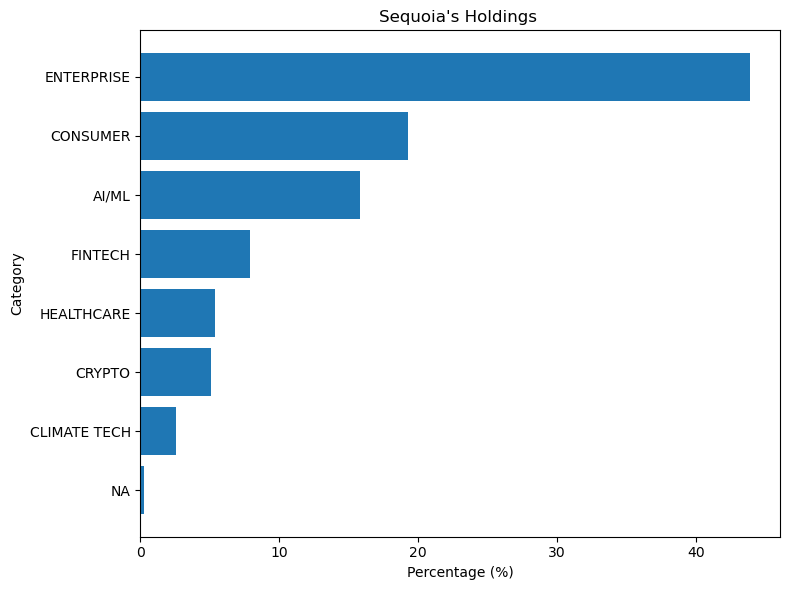

In [110]:

topcategories = category_percentages.sort_values(ascending=True).head(10)

# Create a horizontal bar chart (adjust figure size as desired)
plt.figure(figsize=(8, 6))
plt.barh(topcategories.index, topcategories.values)

# Set labels and title
plt.xlabel("Percentage (%)")
plt.ylabel("Category")
plt.title("Sequoia's Holdings ")

# Show the plot
plt.tight_layout()
plt.show()


#### INSIGHTS ON STAGES OF SEQUOIA'S HOLDINGS 
There are five different stages contained in the dataset, most companies are still in the growth phase while lesser companies are in the acquired stage

In [111]:
# """ The different company stages are Growth, IPO, Early, Acquired, and Pre-Seed/Seed. 
#     Majority of Companies (42%) are currently in the Growth Stage 
#     14% of Companies are at the IPO Stage
# """

df_stage = df[['name','stage']]

df_stage.describe()

df_stage['stage'].unique()

# #Frequency of different Company Growth Phases
stage_counts = df_stage['stage'].value_counts()
# print(stage_counts)

# Get stage value counts as percentages
stage_percentages = df_stage['stage'].value_counts(normalize=True) * 100
print("\n")
# Print the Series with percentages
print(stage_percentages.to_string())



stage
Growth           43.235294
Early            16.470588
Pre-Seed/Seed    16.470588
IPO              14.411765
Acquired          9.411765


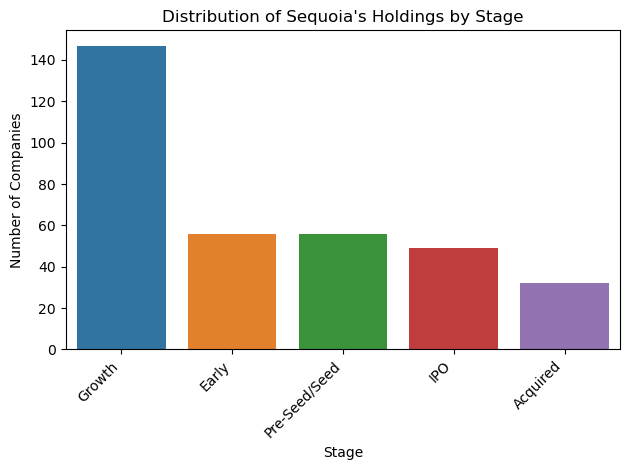

In [112]:

sns.barplot(x=stage_counts.index, y=stage_counts.values)

#Labels and Title
plt.xlabel("Stage")
plt.ylabel("Number of Companies")
plt.title("Distribution of Sequoia's Holdings by Stage")

plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()
 

In [113]:
#Company that got to IPO in the shortest amount of time
new_df['Time to IPO']= new_df['Time to IPO'].astype(int)


In [114]:
#To filter out countries that are not yet at the IPO Phase
ipo_df = new_df[new_df['IPO Year'] > 0]
ipo_df


,name,category,Founded Year,Partnered Year,IPO Year,Year Difference,Time to IPO
2,23ANDME,HEALTHCARE,2006,2017,2021,11,15
6,AIRBNB,CONSUMER,2007,2009,2020,2,13
12,AMPLITUDE,ENTERPRISE,2012,2018,2021,6,9
17,APPLE,CONSUMER,1976,1978,1980,2,4
21,ATARI,CONSUMER,1972,1975,2003,3,31
23,AURORA,"AI/ML, CLIMATE TECH, ENTERPRISE",2016,2019,2021,3,5
25,BARRACUDA,ENTERPRISE,2003,2005,2013,2,10
31,BIRD,CONSUMER,2017,2018,2021,1,4
32,BLOCK,"CONSUMER, CRYPTO, FINTECH",2009,2011,2015,2,6
38,BRIDGEBIO,HEALTHCARE,2014,2018,2019,4,5


In [115]:
ipo_stats = ipo_df.describe()
ipo_stats

,Founded Year,Partnered Year,IPO Year,Year Difference,Time to IPO
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,2002.880000,2006.220000,2012.420000,3.340000,9.540000
std,10.112914,10.750017,10.351161,3.248924,5.083828
min,1972.000000,1975.000000,1980.000000,-2.000000,2.000000
25%,2001.000000,2003.000000,2011.250000,1.000000,6.250000
50%,2005.000000,2008.500000,2015.000000,3.000000,8.500000
75%,2009.000000,2013.750000,2020.000000,5.000000,11.000000
max,2017.000000,2019.000000,2024.000000,13.000000,31.000000


In [116]:
#A New Data Frame to have name and time to ipo side by side, for company's that have conducted an IPO*
comp_ipo= ipo_df[['name', 'Time to IPO']]
comp_ipo

,name,Time to IPO
2,23ANDME,15
6,AIRBNB,13
12,AMPLITUDE,9
17,APPLE,4
21,ATARI,31
23,AURORA,5
25,BARRACUDA,10
31,BIRD,4
32,BLOCK,6
38,BRIDGEBIO,5


####  50 OF SEQUOIA'S HOLDINGS HAVE RAISED AN IPO


####  TIME TO GET TO THE IPO STAGE FROM FOUNDING
**YAHOO** took the shortest time (2 years) to get to the IPO stage, while  **ATARI** took the longest time (30 years)

In [117]:
#To Get Minimum 
min_time_to_ipo_index = ipo_df['Time to IPO'].idxmin()

min_time_to_ipo_row = new_df.loc[min_time_to_ipo_index]
print(min_time_to_ipo_row)

name                  YAHOO
category           CONSUMER
Founded Year           1994
Partnered Year         1995
IPO Year               1996
Year Difference           1
Time to IPO               2
Name: 330, dtype: object


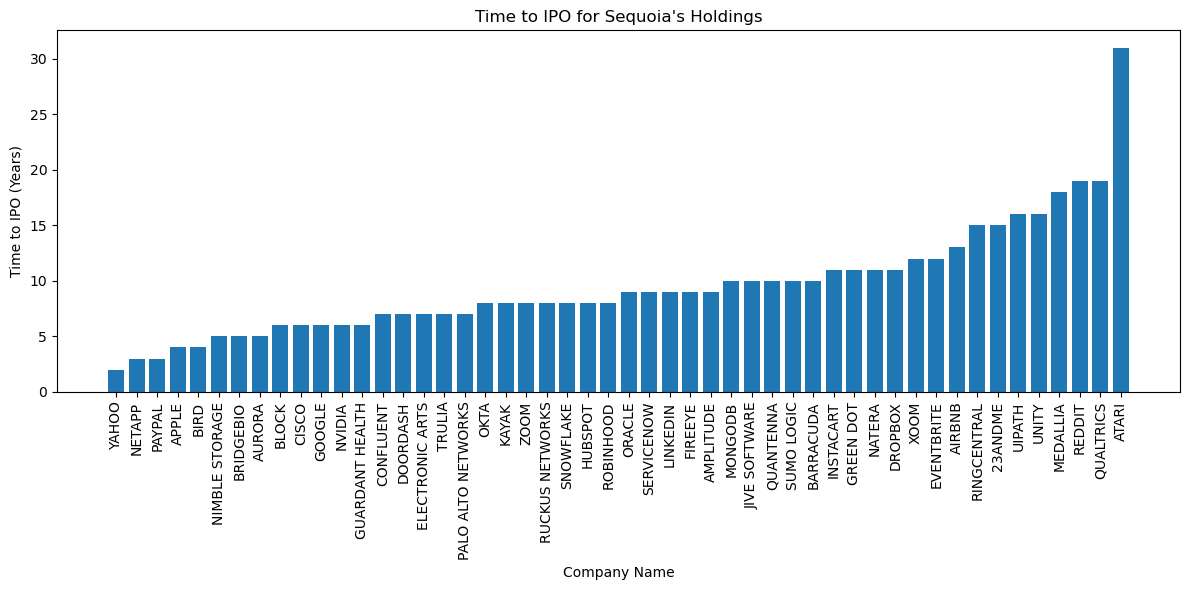

In [118]:

#Sorts the DataFrame by 'Time to IPO'
comp_ipo_sorted = comp_ipo.sort_values(by='Time to IPO')

#Bar chart
#Company Name: x-axis, Time to IPO: Y-Axis
plt.figure(figsize=(12, 6))  # Adjust figure size as desired
plt.bar(comp_ipo_sorted['name'], comp_ipo_sorted['Time to IPO'])
plt.xticks(rotation=90)  # Rotate x-axis labels for readability

plt.xlabel("Company Name")
plt.ylabel("Time to IPO (Years)")
plt.title("Time to IPO for Sequoia's Holdings")

#Present
plt.tight_layout()
plt.show()

In [119]:
#Creat dataframe to juxtapose company stage and category
stagecat = df[['name', 'stage', 'category']]

#To filter only early stage companies
early_stage = stagecat[stagecat['stage'] == 'Early']
early_stage


,name,stage,category
3,AALTO,Early,CONSUMER
33,BLOCKAID,Early,"CRYPTO, ENTERPRISE"
34,BLUES WIRELESS,Early,ENTERPRISE
37,BREWBIRD,Early,ENTERPRISE
45,CATCH,Early,FINTECH
48,CHAINGUARD,Early,ENTERPRISE
58,CLOSEFACTOR,Early,AI/ML
64,COMMONS,Early,"CLIMATE TECH, CONSUMER"
67,CORTEX,Early,ENTERPRISE
70,CTRLSTACK,Early,"AI/ML, ENTERPRISE"


In [120]:
#To Juxtapose Stage and Category
pd.crosstab(stagecat['category'],stagecat['stage'])

stage,Acquired,Early,Growth,IPO,Pre-Seed/Seed
category,,,,,
AI/ML,1,1,6,0,8
"AI/ML, CLIMATE TECH",0,0,0,0,1
"AI/ML, CLIMATE TECH, ENTERPRISE",0,0,1,1,0
"AI/ML, CONSUMER",1,0,2,1,1
"AI/ML, CONSUMER, ENTERPRISE",0,1,2,0,0
"AI/ML, ENTERPRISE",2,9,18,1,5
"AI/ML, ENTERPRISE, FINTECH",0,0,1,0,0
"AI/ML, FINTECH",0,0,1,0,0
"AI/ML, HEALTHCARE",0,1,2,0,1


In [121]:
early_stage.head()

,name,stage,category
3,AALTO,Early,CONSUMER
33,BLOCKAID,Early,"CRYPTO, ENTERPRISE"
34,BLUES WIRELESS,Early,ENTERPRISE
37,BREWBIRD,Early,ENTERPRISE
45,CATCH,Early,FINTECH


category
ENTERPRISE                            25
AI/ML, ENTERPRISE                      9
CONSUMER                               5
CRYPTO                                 4
CRYPTO, ENTERPRISE                     2
FINTECH                                2
HEALTHCARE                             2
AI/ML                                  1
CLIMATE TECH, CONSUMER                 1
CONSUMER, CRYPTO                       1
AI/ML, HEALTHCARE                      1
CONSUMER, HEALTHCARE                   1
CLIMATE TECH, CONSUMER, ENTERPRISE     1
AI/ML, CONSUMER, ENTERPRISE            1
Name: count, dtype: int64


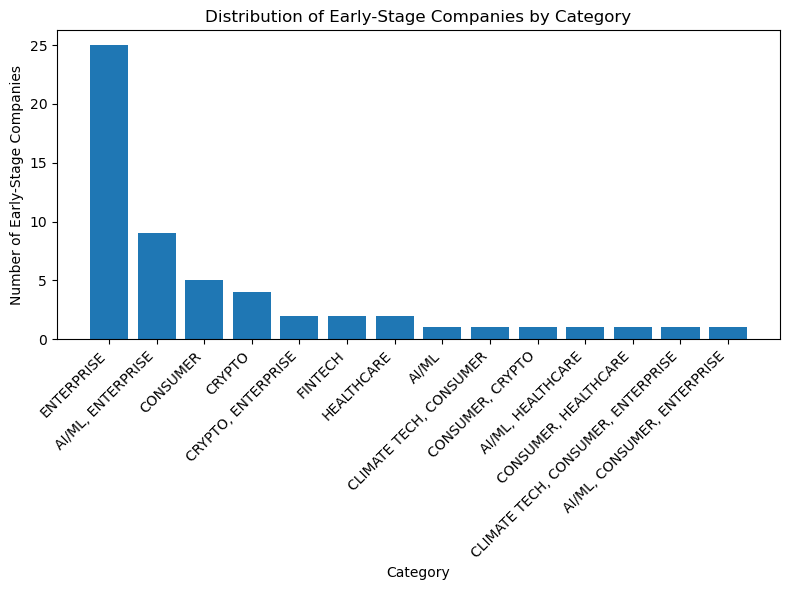

In [122]:
#Visualization for early-stage company distribution
category_counts = early_stage['category'].value_counts()
print(category_counts)
plt.figure(figsize=(8, 6)) 
plt.bar(category_counts.index, category_counts.values)

plt.xlabel("Category")
plt.ylabel("Number of Early-Stage Companies")
plt.title("Distribution of Early-Stage Companies by Category")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

plt.tight_layout()
plt.show()

